IDSS Track-1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 6.4 MB/s 


In [ ]:
import sweetviz

In [ ]:
data = pd.read_csv("training_set_track1.csv")
data.drop("Id", axis=1, inplace=True)
data_test = pd.read_csv("test_track1.csv")
idcol=data_test['Id']
data_test.drop("Id", axis=1, inplace=True)

In [ ]:
data.columns

Index(['date', 'T_avg', 'PR_avg', 'HR_avg', 'VV_avg', 'RS_avg', 'EVo[mm]'], dtype='object')

In [ ]:
report = sweetviz.analyze(data, 'EVo[mm]')
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


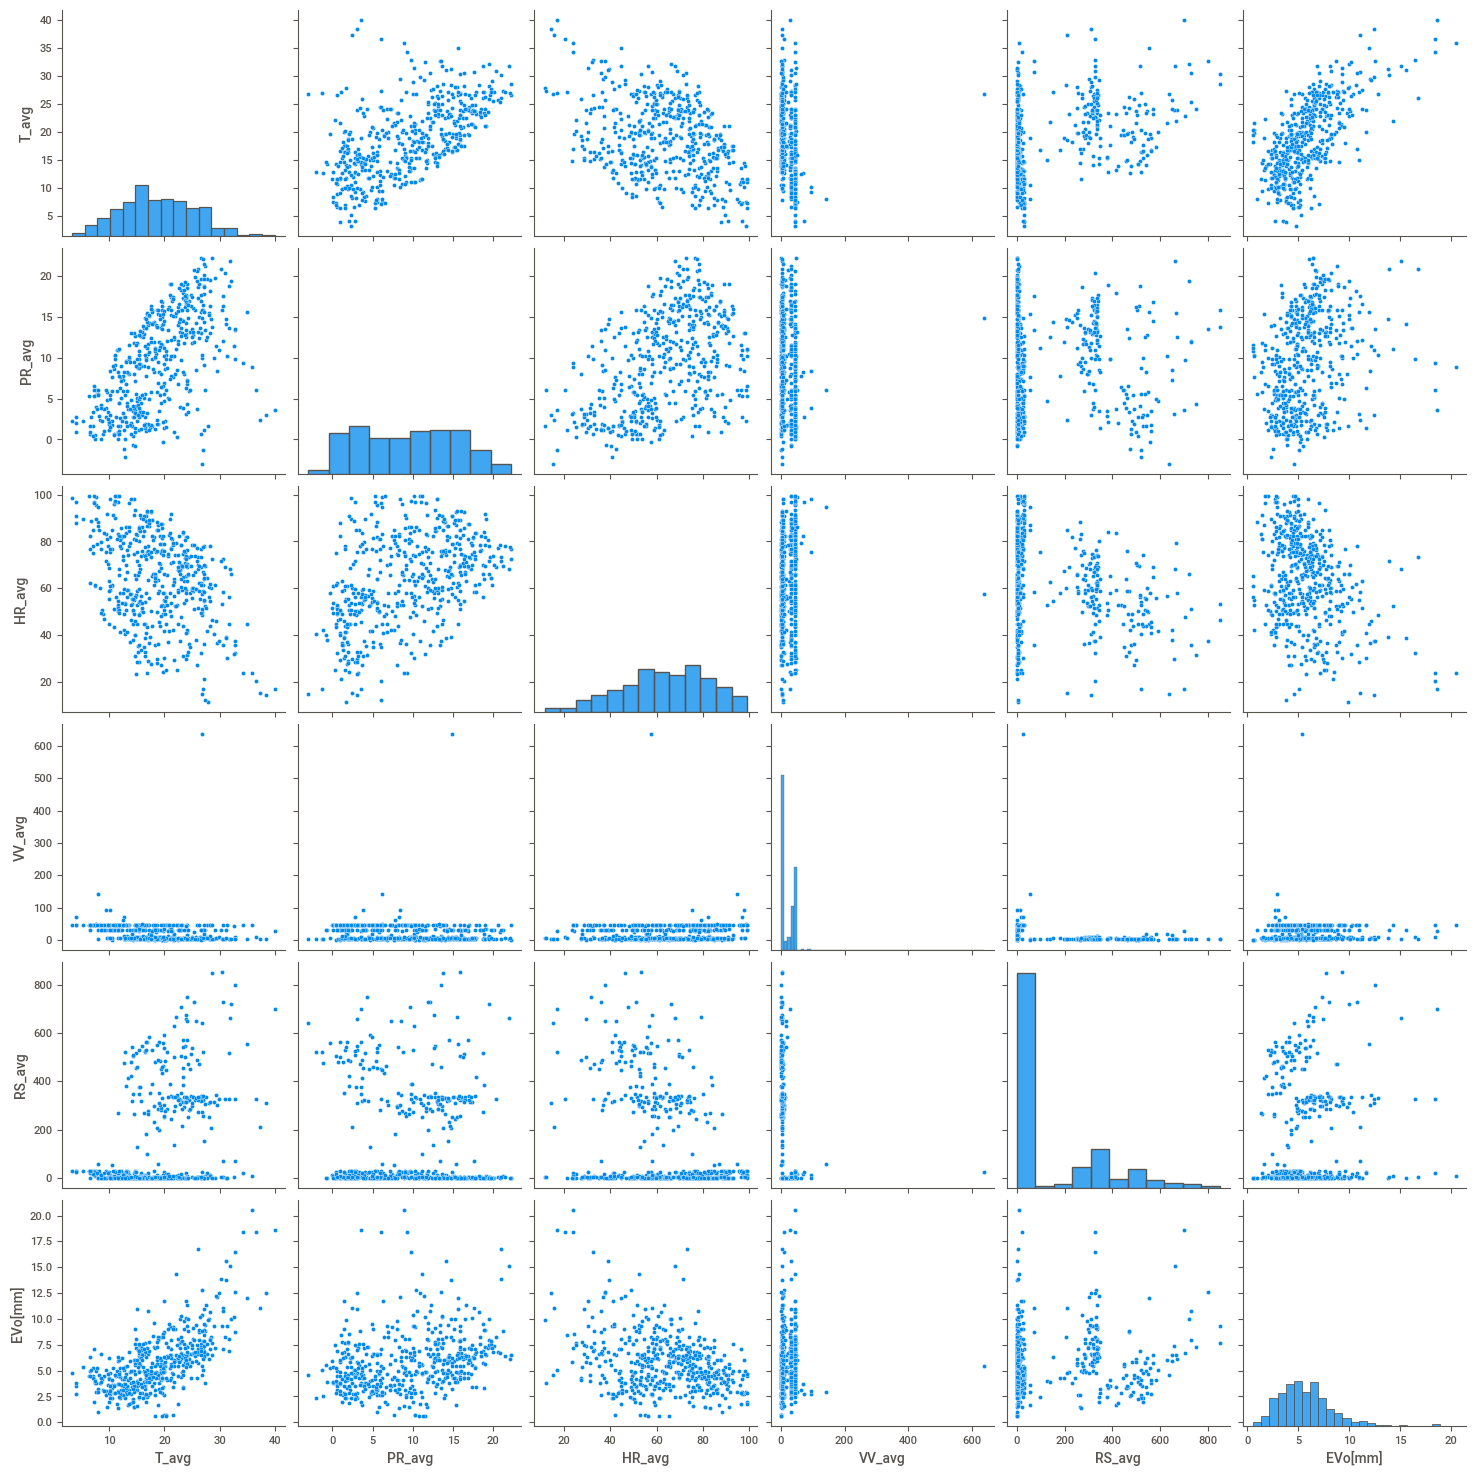

In [ ]:
sns.pairplot(data)

In [ ]:
data.head()

,date,T_avg,PR_avg,HR_avg,VV_avg,RS_avg,EVo[mm]
0,4/3/2017,20.33,10.28,52.91,0.00,0.0,0.7
1,4/4/2017,19.91,10.26,54.97,0.10,0.0,0.7
2,4/5/2017,20.31,10.78,56.36,0.00,0.0,0.6
3,4/6/2017,22.37,6.80,44.67,0.69,0.0,1.8
4,4/7/2017,21.56,7.62,42.07,0.00,0.0,0.7


In [ ]:

dat = []
for i in range(data.shape[0]):
    if eval(data.loc[i,"date"].split("/")[0]) in [12,1,2]:
        dat.append("0")
    if eval(data.loc[i,"date"].split("/")[0]) in [3,4,5]:
        dat.append("1")
    if eval(data.loc[i,"date"].split("/")[0]) in [6,7,8]:
        dat.append("2")
    if eval(data.loc[i,"date"].split("/")[0]) in [9,10,11]:
        dat.append("3")
data["saison"] = dat
date = data["date"]
data.drop("date", axis=1, inplace=True)

In [ ]:
dat = []
for i in range(data_test.shape[0]):
    if eval(data_test.loc[i,"date"].split("/")[0]) in [12,1,2]:
        dat.append("0")
    if eval(data_test.loc[i,"date"].split("/")[0]) in [3,4,5]:
        dat.append("1")
    if eval(data_test.loc[i,"date"].split("/")[0]) in [6,7,8]:
        dat.append("2")
    if eval(data_test.loc[i,"date"].split("/")[0]) in [9,10,11]:
        dat.append("3")
data_test["saison"] = dat
date = data_test["date"]
data_test.drop("date", axis=1, inplace=True)

In [ ]:
data["saison"]

0      1
1      1
2      1
3      1
4      1
      ..
494    1
495    1
496    1
497    1
498    1
Name: saison, Length: 499, dtype: object

In [ ]:
data.max()

T_avg      39.94
PR_avg      22.2
HR_avg     99.27
VV_avg       636
RS_avg       851
EVo[mm]     20.5
saison         3
dtype: object

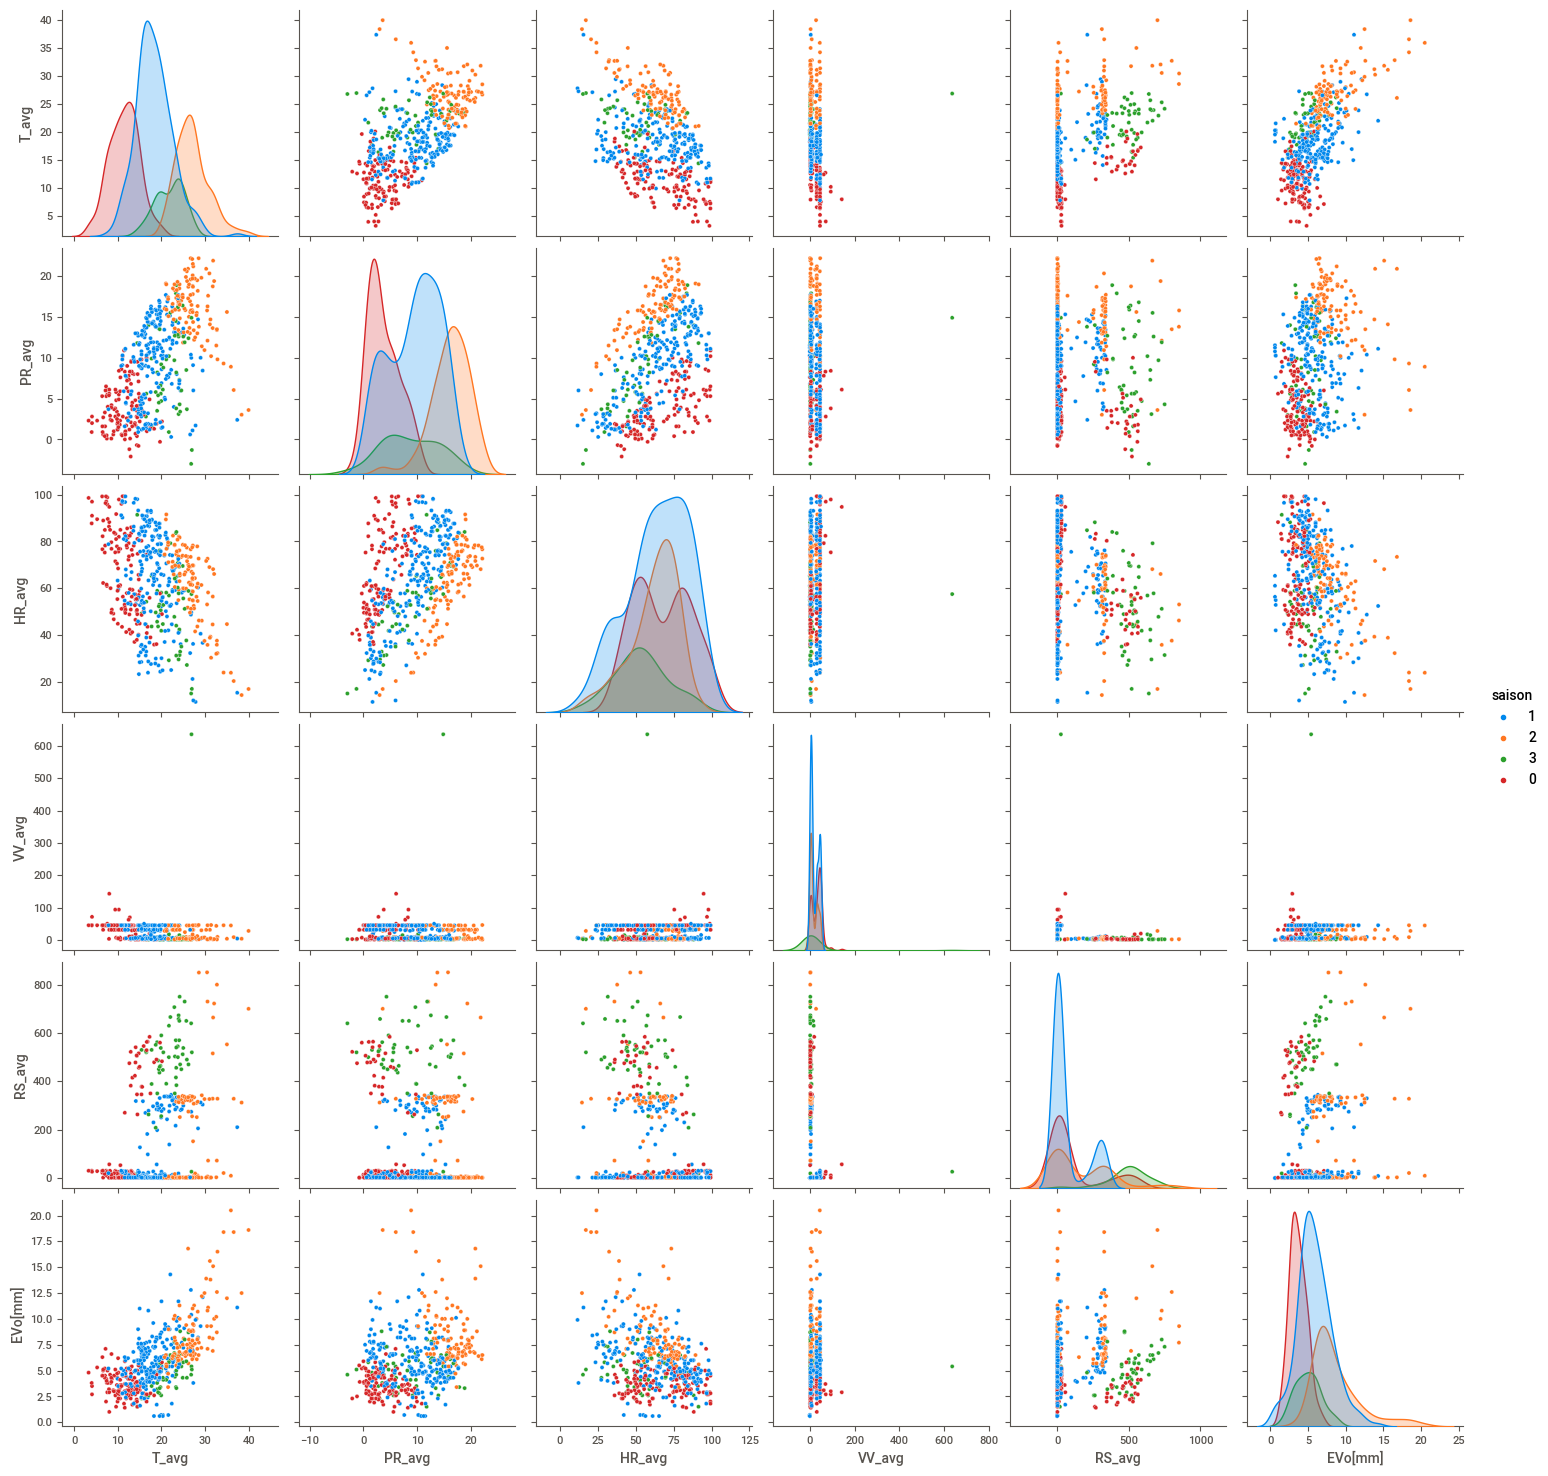

In [ ]:
sns.pairplot(data, hue="saison")

In [ ]:
data

,T_avg,PR_avg,HR_avg,VV_avg,RS_avg,EVo[mm],saison
0,20.33,10.28,52.91,0.00,0.0,0.7,1
1,19.91,10.26,54.97,0.10,0.0,0.7,1
2,20.31,10.78,56.36,0.00,0.0,0.6,1
3,22.37,6.80,44.67,0.69,0.0,1.8,1
4,21.56,7.62,42.07,0.00,0.0,0.7,1
...,...,...,...,...,...,...,...
494,14.86,9.00,80.51,44.80,24.3,8.1,1
495,15.60,12.70,84.35,3.20,1.5,2.8,1
496,15.46,12.80,85.79,34.10,2.0,4.9,1
497,18.22,10.80,64.89,33.00,3.4,5.4,1


In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x = rs.fit_transform(data.drop(["saison", 'EVo[mm]'], axis=1, inplace=False))


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
target='EVo[mm]'
x=data.drop(target, axis=True)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, data[target], test_size=0.2,random_state=1)
#xtrain=rs.fit_transform(xtrain)
#xtest=rs.transform(xtest)

In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05)
out_ind = iso.fit_predict(xtrain)
xtrain = xtrain[out_ind==1]
ytrain = pd.DataFrame(ytrain).values[out_ind==1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(xtrain, ytrain)
ypred_tr = ada.predict(xtrain)
ypred_ts = ada.predict(xtest)

In [ ]:
from sklearn.metrics import mean_absolute_error, max_error, r2_score, mean_squared_error
print("Training Results:")
print(f"MAE: {mean_absolute_error(ytrain, ypred_tr)}")
print(f"Max Error: {max_error(ytrain, ypred_tr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytrain, ypred_tr))}")
print(f"R2: {r2_score(ytrain, ypred_tr)}")

print("\n\nTesting Results:")
print(f"MAE: {mean_absolute_error(ytest, ypred_ts)}")
print(f"Max Error: {max_error(ytest, ypred_ts)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, ypred_ts))}")
print(f"R2: {r2_score(ytest, ypred_ts)}")

Training Results:
MAE: 1.2310911332849463
Max Error: 3.0679324894514863
RMSE: 1.4635309366236602
R2: 0.725180843813074


Testing Results:
MAE: 1.2684629099258447
Max Error: 5.603200000000012
RMSE: 1.7062919048610958
R2: 0.6978343653014523


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random= RandomForestRegressor(max_depth=5)
random.fit(xtrain, ytrain)
ypred_tr = random.predict(xtrain)
ypred_ts = random.predict(xtest)
print("Training Results:")
print(f"MAE: {mean_absolute_error(ytrain, ypred_tr)}")
print(f"Max Error: {max_error(ytrain, ypred_tr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytrain, ypred_tr))}")
print(f"R2: {r2_score(ytrain, ypred_tr)}")

print("\n\nTesting Results:")
print(f"MAE: {mean_absolute_error(ytest, ypred_ts)}")
print(f"Max Error: {max_error(ytest, ypred_ts)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, ypred_ts))}")
print(f"R2: {r2_score(ytest, ypred_ts)}")

Training Results:
MAE: 0.9532632305107281
Max Error: 5.372796602668981
RMSE: 1.2287372854910628
R2: 0.8062858873856869


Testing Results:
MAE: 1.070068776944824
Max Error: 5.546946323200823
RMSE: 1.4734354125538514
R2: 0.7746795464672118


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#xtrain=rs.fit_transform(xtrain)
#xtest=rs.transform(xtest)
KNN= KNeighborsRegressor(n_neighbors=11)
KNN.fit(xtrain, ytrain)
ypred_tr = KNN.predict(xtrain)
ypred_ts = KNN.predict(xtest)
print("Training Results:")
print(f"MAE: {mean_absolute_error(ytrain, ypred_tr)}")
print(f"Max Error: {max_error(ytrain, ypred_tr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytrain, ypred_tr))}")
print(f"R2: {r2_score(ytrain, ypred_tr)}")

print("\n\nTesting Results:")
print(f"MAE: {mean_absolute_error(ytest, ypred_ts)}")
print(f"Max Error: {max_error(ytest, ypred_ts)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, ypred_ts))}")
print(f"R2: {r2_score(ytest, ypred_ts)}")

Training Results:
MAE: 1.3695602642971065
Max Error: 10.663636363636364
RMSE: 1.97536622128559
R2: 0.49934514306563205


Testing Results:
MAE: 1.6178181818181816
Max Error: 8.68181818181818
RMSE: 2.258172302717472
R2: 0.4707601198519379


In [ ]:
model_4 = VotingRegressor([('ada', ada),
                            ('random', random),
                            ('KNN', KNN)])
model_4.fit(xtrain, ytrain)
ypred_tr = model_4.predict(xtrain)
ypred_ts = model_4.predict(xtest)
print("Training Results:")
print(f"MAE: {mean_absolute_error(ytrain, ypred_tr)}")
print(f"Max Error: {max_error(ytrain, ypred_tr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytrain, ypred_tr))}")
print(f"R2: {r2_score(ytrain, ypred_tr)}")

print("\n\nTesting Results:")
print(f"MAE: {mean_absolute_error(ytest, ypred_ts)}")
print(f"Max Error: {max_error(ytest, ypred_ts)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, ypred_ts))}")
print(f"R2: {r2_score(ytest, ypred_ts)}")


Training Results:
MAE: 1.0725985751124258
Max Error: 5.30621299797466
RMSE: 1.388066964580469
R2: 0.7527911443841149


Testing Results:
MAE: 1.2356959124457776
Max Error: 6.028431062367421
RMSE: 1.6826917182764314
R2: 0.7061352296449007


In [ ]:
from sklearn.ensemble import BaggingRegressor
model_5=BaggingRegressor(base_estimator=KNN,
                         n_estimators=150)
model_5.fit(xtrain, ytrain)
ypred_tr = model_5.predict(xtrain)
ypred_ts = model_5.predict(xtest)
print("Training Results:")
print(f"MAE: {mean_absolute_error(ytrain, ypred_tr)}")
print(f"Max Error: {max_error(ytrain, ypred_tr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytrain, ypred_tr))}")
print(f"R2: {r2_score(ytrain, ypred_tr)}")

print("\n\nTesting Results:")
print(f"MAE: {mean_absolute_error(ytest, ypred_ts)}")
print(f"Max Error: {max_error(ytest, ypred_ts)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, ypred_ts))}")
print(f"R2: {r2_score(ytest, ypred_ts)}")

Training Results:
MAE: 1.3559097744360904
Max Error: 11.124666666666666
RMSE: 1.9714193242668625
R2: 0.501343819590695


Testing Results:
MAE: 1.6086115151515148
Max Error: 8.889151515151516
RMSE: 2.2927162510729238
R2: 0.45444438700003786


In [ ]:
from sklearn.ensemble import StackingRegressor
model_6 = StackingRegressor([('ada', ada),
                            ('random', random),
                            ('KNN', KNN)])
model_6.fit(xtrain, ytrain)
ypred_tr = model_6.predict(xtrain)
ypred_ts = model_6.predict(xtest)
print("Training Results:")
print(f"MAE: {mean_absolute_error(ytrain, ypred_tr)}")
print(f"Max Error: {max_error(ytrain, ypred_tr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytrain, ypred_tr))}")
print(f"R2: {r2_score(ytrain, ypred_tr)}")

print("\n\nTesting Results:")
print(f"MAE: {mean_absolute_error(ytest, ypred_ts)}")
print(f"Max Error: {max_error(ytest, ypred_ts)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest, ypred_ts))}")
print(f"R2: {r2_score(ytest, ypred_ts)}")

Training Results:
MAE: 0.9421936725044363
Max Error: 4.734021221211666
RMSE: 1.199079551191414
R2: 0.815524294071394


Testing Results:
MAE: 1.0848466017438152
Max Error: 5.314980447529669
RMSE: 1.4713519836462954
R2: 0.7753162995278168


In [ ]:
sub = pd.DataFrame(np.empty(shape=(data_test.shape[0], 2)), columns=["Id", target])
sub[target]=model_6.predict(data_test)
sub["Id"] = idcol
sub.to_csv("submission.csv", index=False)

In [ ]:
data_test

,date,T_avg,PR_avg,HR_avg,VV_avg,RS_avg
0,10/8/2019,21.73,12.30,56.43,11.10,4.20
1,10/9/2019,21.43,12.70,61.66,11.80,4.40
2,10/10/2019,19.72,17.70,93.69,29.10,8.60
3,10/11/2019,19.78,17.50,94.83,43.50,5.20
4,10/12/2019,17.59,14.60,89.59,30.30,11.00
...,...,...,...,...,...,...
165,5/22/2020,21.52,13.65,65.80,3.04,1.48
166,5/23/2020,21.35,15.31,72.60,2.99,1.45
167,5/24/2020,21.91,13.95,67.29,2.42,1.12
168,5/25/2020,22.18,12.78,63.00,2.92,1.40
